# Python期末大作业
* 项目名称：代码查重的实现
* 作者：吴遥
* 学号：3200411039
* 班级：计算机206
* 创建时间：2022-5-30 19:20:31

## 研究背景
* 越来越多的学术论文都采用代码的形式实现，并将代码开源供其他科研工作者复现。代码在学术论文中的地位变得越来越重要。
* 在工程应用领域，几乎都使用代码来实现软件层面的精准控制。
* 所以，我们急需一种准确且先进的算法来实现来检测代码的重复率。

In [1]:
#conding=utf8
import os
import time
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
%matplotlib inline 

def getMdate(file):
    # os.stat return properties of a file
    tmpTime = time.localtime(os.stat(file).st_mtime)
    return time.strftime('%Y-%m-%d %H:%M:%S', tmpTime)

def traverse_file(input_path):
    paths = []
    for path,dir_name,file_list in os.walk(input_path):
        for file_name in file_list:
            paths.append(os.path.join(path, file_name))
            # print(os.path.join(path, file_name))
    return paths

def getTimeStamp(dt):
    #转换成时间数组
    timeArray = time.strptime(dt, "%Y-%m-%d %H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    return timestamp

def preprocess(code):
    return code

def getFilesize(filePath):
    fsize = os.path.getsize(filePath)
    return round(fsize/1024,2)

def similarity(info,info_2):
    l1= len(set(sorted(info)))
    l2 = len(set(sorted(info_2)))
    k3 = set(sorted(info)) & set(sorted(info_2))
    l3 = len(k3)

    result = (l3 /(l1*l2)**0.5)**0.5
    return result

## 读取并且清洗数据
* k[index]的结构 = 代码存放地址 + 代码

In [2]:
add_list = traverse_file("N宫格")
k = []
for i in add_list:
    with open(i,encoding='utf-8') as f:
        k.append([i]+f.readlines())
    f.close()

## 清洗数据
* 遍历k
* 将k中的每一个元素去除空格,避免代码格式化带来的降重
* 比如 "values=   5" 与 "values = 5"
* 前者为未格式化，后者为格式化，去除空格后均为"values=5",判定为一致

In [3]:
s = []
for l in k:
    l = [i.strip() for i in l]
    l = [i for i in l if i!='']
    l = [i.replace(" ","") for i in l ]
    s.append(l)

## 值得注意
* 我们更加关注代码主体部分
* 所以在查重过程中去除了注释部分
* 以 # 开头的行会被判定为注释

In [4]:
student_code ={}
for o in s:

    filepath,fullflname = os.path.split(o[0])
    fname,ext = os.path.splitext(fullflname)
    fname = fname.replace("_","-")

    code_info = {}
    student_number  =fname.split("-")[0]
    name = fname.split("-")[1]
    modify_time = getMdate(o[0])

    code_info['姓名'] = name
    code_info['修改时间'] = modify_time
    code_info['时间戳'] = getTimeStamp(modify_time)
    code_info['文件名'] = fname
    code_info['文件类型'] = ext
    code_info['文件大小(KB)'] = getFilesize(o[0])
    code_info['行数'] = len(o)-1
    code_info['导入库'] = []
    code_info['注释'] = []
    code_info['代码主体'] = []

    for j in o[1:]:
        if j[:6]=='import' or ('import' in j and 'from' in j):
            code_info['导入库'].append(j)
        elif '#' in j:
            sig_index = j.find("#")
            if sig_index!=0:
                code_info['代码主体'].append(j[:sig_index])
            code_info['注释'].append(j[sig_index:])
        else:
            code_info['代码主体'].append(j)
    # for j in o[1:]:
    #     if j[:6]=='import' or ('import' in j and 'from' in j):
    #         code_info['导入库'].append(j)
    #     elif j[0]=="#":
    #         code_info['注释'].append(j)
    #     else:
    #         code_info['代码主体'].append(j)

    code_info['全部代码'] = code_info['导入库']+code_info['代码主体']
    student_code[student_number] = code_info

df_student_code = pd.DataFrame(student_code)
df_student_code = df_student_code.T
# df_student_code

In [5]:
df = df_student_code.reset_index(level=0)
df = df.rename(columns={'index':'学号'})
df.to_excel("作业源代码基本信息.xlsx",index=False)
df

,学号,姓名,修改时间,时间戳,文件名,文件类型,文件大小(KB),行数,导入库,注释,代码主体,全部代码
0,3190421005,陈欣平,2022-05-16 09:59:19,1652666359.0,3190421005-陈欣平,.py,1.69,64,"[importnumpyasnp, importmath, importmatplotlib...",[],"[defreShape(img,n):, size=img.shape, h=size[0]...","[importnumpyasnp, importmath, importmatplotlib..."
1,3190421039,陈成轩,2021-12-06 14:08:44,1638770924.0,3190421039-陈成轩,.py,4.42,91,"[importlocale, importctypes, importre, importc...","[#remotepointer, #remotepointer]","[DEFAULT_CODING=locale.getpreferredencoding(),...","[importlocale, importctypes, importre, importc..."
2,3190421048,邱紫阳,2022-05-16 10:12:47,1652667167.0,3190421048-邱紫阳,.py,2.76,86,"[importnumpyasnp, importmatplotlib.pyplotasplt...","[#引入模块, #读入图片, #查看数据形状，其形状是[H,W,3]，其中H代表高度，W是宽...","[n=int(input(""请输入一个整数:"")), image=Image.open('n...","[importnumpyasnp, importmatplotlib.pyplotasplt..."
3,3190616035,蔡雨晴,2022-05-09 11:12:02,1652065922.0,3190616035-蔡雨晴,.py,1.1,47,"[importmath, importnumpyasnp, importmatplotlib...","[#居中剪裁, #print(i,j), #随机分格]","[defcen(w,h,n):, lis=[], hx=0, wx=0, ifw%n:, t...","[importmath, importnumpyasnp, importmatplotlib..."
4,3200411002,左鲡蔚,2022-05-16 09:53:08,1652665988.0,3200411002-左鲡蔚,.py,1.1,35,"[importnumpyasnp, importmatplotlib.pyplotasplt...","[#建立全黑图像, #切割axis=0横切, #随机图片, #拼在一起, #切割axis=1纵切]","[image=Image.open(r""C:\\Users\\18431\\Desktop\...","[importnumpyasnp, importmatplotlib.pyplotasplt..."
...,...,...,...,...,...,...,...,...,...,...,...,...
57,3200621009,王昊宇,2022-05-16 10:01:16,1652666476.0,3200621009-王昊宇,.py,1.12,33,"[importrandom, fromPILimportImage, importmatpl...",[#放置位置],"[number=int(input()), image=Image.open('/Users...","[importrandom, fromPILimportImage, importmatpl..."
58,3200621087,邱宇,2022-05-02 20:33:29,1651494809.0,3200621087-邱宇,.py,1.34,38,"[importnumpyasnp, importcv2ascv, importmath, i...","[#cv.imshow(""source"",source), #cv.waitKey(0), ...","[source=cv.imread(""nit.jpg""), sourceRows=sourc...","[importnumpyasnp, importcv2ascv, importmath, i..."
59,3200621150,施怿宁,2022-05-16 10:01:49,1652666509.0,3200621150-施怿宁,.py,1.02,38,"[importmath, importrandom, importnumpyasnp, im...","[#居中裁剪, #随机生成一个列表，代表我拼接的图片块是随机的]","[image=Image.open(r""C:\Users\WIN10\Desktop\\ni...","[importmath, importrandom, importnumpyasnp, im..."
60,3200622028,阮斌,2022-05-16 09:51:54,1652665914.0,3200622028-阮斌,.py,1.18,47,"[importnumpyasnp, importmatplotlib.pyplotasplt...","[#读入图片, #plt.imshow(im), #输入一个数字并计算行数和列数, #pri...","[im=Image.open('ruanbin.jpg'), im=np.array(im)...","[importnumpyasnp, importmatplotlib.pyplotasplt..."


## 代码相似度判定
* info_all 记录了所有人之间的代码相似度
* info_all 储存了一个 N * N 二维举证，其中N=全部人数

In [6]:
similarity_info = {}
for j in range(len(df_student_code.values)):
    tmp = {}
    for i in range(len(df_student_code.values)):
        sim_val = similarity(df_student_code['全部代码'][j],df_student_code['全部代码'][i])
        tmp[df_student_code['姓名'][i]] = sim_val

    similarity_info[df_student_code['姓名'][j]] = tmp


info_all = pd.DataFrame(similarity_info)
info_all

,陈欣平,陈成轩,邱紫阳,蔡雨晴,左鲡蔚,于俊涛,王佳萌,吴遥,谢官宝,宓书仪,...,黄文轩,黄逸轩,姜育恒,吕浩嘉,孙汉成,王昊宇,邱宇,施怿宁,阮斌,谷茜楠
陈欣平,1.000000,0.0,0.270240,0.311949,0.259654,0.273012,0.267603,0.135804,0.137966,0.304545,...,0.273012,0.200808,0.263744,0.263744,0.299822,0.213644,0.321371,0.291368,0.295444,0.291368
陈成轩,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.132139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
邱紫阳,0.270240,0.0,1.000000,0.292028,0.313804,0.329949,0.313142,0.201013,0.250109,0.318748,...,0.329949,0.332312,0.276044,0.276044,0.415124,0.273861,0.168179,0.304956,0.345721,0.340951
蔡雨晴,0.311949,0.0,0.292028,1.000000,0.428605,0.450656,0.382547,0.207540,0.210845,0.465416,...,0.417226,0.375852,0.367944,0.367944,0.362237,0.365035,0.300755,0.472289,0.391017,0.445278
左鲡蔚,0.259654,0.0,0.313804,0.428605,1.000000,0.409275,0.515308,0.223017,0.226567,0.433118,...,0.366067,0.403879,0.353640,0.353640,0.301511,0.303840,0.263877,0.414378,0.383565,0.414378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
王昊宇,0.213644,0.0,0.273861,0.365035,0.303840,0.368894,0.271189,0.710687,0.703720,0.356371,...,0.368894,0.287791,0.308626,0.308626,0.764647,1.000000,0.188030,0.381195,0.345721,0.381195
邱宇,0.321371,0.0,0.168179,0.300755,0.263877,0.277453,0.235521,0.169031,0.171722,0.328273,...,0.277453,0.176734,0.268034,0.268034,0.186589,0.188030,1.000000,0.314069,0.318463,0.314069
施怿宁,0.291368,0.0,0.304956,0.472289,0.414378,0.470606,0.452971,0.216728,0.220179,0.642944,...,0.435697,0.358293,0.384233,0.384233,0.378274,0.381195,0.314069,1.000000,0.408327,0.677834
阮斌,0.295444,0.0,0.345721,0.391017,0.383565,0.403299,0.342347,0.219760,0.273435,0.426794,...,0.403299,0.324950,0.348476,0.348476,0.383565,0.345721,0.318463,0.408327,1.000000,0.441044


# 判定规则
* 如果提交时间早于原作者，则原作者疑似为抄袭者，原作者抄袭率增加；
* 如果提交时间晚于原作者，则原作者疑似为原创者，原作者被抄袭率增加。

# 个人代码相似度Dataframe
* 搜索任意一个人的查重信息

In [7]:
find_name = '吴遥' # 输入你想要找的姓名
info_me = pd.DataFrame(similarity_info)[find_name]
df_me = pd.DataFrame({'姓名':info_me.index, '相似度':info_me.values})
df_me = df_me.sort_values(by='相似度')[::-1]
# print(df_student_code.columns)
df_tmp = pd.merge(df_me,df_student_code,on='姓名').iloc[:,[0,1,3]]

mask = [1 if i > df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
df_tmp['提交时间是否晚于原作者'] = mask

mask = [1 if i <= df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
df_tmp['提交时间是否早于原作者'] = mask

df_tmp['被抄袭率'] = df_tmp['提交时间是否晚于原作者'] * df_tmp['相似度']
df_tmp['抄袭率'] = df_tmp['提交时间是否早于原作者'] * df_tmp['相似度']

df_len = len(df_tmp.values)
k1 = sum(df_tmp['抄袭率'])/df_len
k2 = sum(df_tmp['被抄袭率'])/df_len
k3=  sum(df_tmp['相似度'])/df_len

copy_ratio_info = {}
copy_ratio_info['抄袭率'] = k1
copy_ratio_info['被抄袭率'] = k2
copy_ratio_info['平均相似度'] = np.mean(df_tmp['相似度'])
# copy_ratio_info['平均相似度'] = np.mean(df_tmp['相似度'][:5])

# print(copy_ratio_info)
df_tmp[:10]

,姓名,相似度,时间戳,提交时间是否晚于原作者,提交时间是否早于原作者,被抄袭率,抄袭率
0,吴遥,1.000000,1652665986.0,0,1,0.000000,1.000000
1,谢官宝,0.929295,1652065494.0,0,1,0.000000,0.929295
2,张俊杰,0.912970,1652666488.0,1,0,0.912970,0.000000
3,王昊宇,0.710687,1652666476.0,1,0,0.710687,0.000000
4,匡咏辉,0.710687,1652663773.0,0,1,0.000000,0.710687
5,张思钧,0.615473,1652878580.0,1,0,0.615473,0.000000
6,孙汉成,0.546277,1652666477.0,1,0,0.546277,0.000000
7,金雨波,0.527060,1652883466.0,1,0,0.527060,0.000000
8,陈宏骏,0.464075,1652666479.0,1,0,0.464075,0.000000
9,夏靖杰,0.435394,1651480173.0,0,1,0.000000,0.435394


## 相似度热力图(全局宏观)
* 颜色越偏红代表两者相似度越高
* 颜色越偏蓝代表两者相似度越低
* 由于info_all中所有值都在0-1之间 
* 所以进行了开方 + 倍数放大的方法
* 0.4，100并非固定参数，可凭借偏好自由调节

In [8]:
plt.figure(dpi = 1000,figsize=(17,12))
sns.heatmap(data=info_all**0.4*100,cmap="RdBu_r",center=50)
plt.title("相似度热力图",fontsize = 30)
plt.savefig("可视化图//相似度热力图.svg")

## 相似度，抄袭率，被抄袭率的叠加图的EXAMPLE

,相似度,抄袭率,被抄袭率
"[0.0, 0.25)",48,58,52
"[0.25, 0.5)",6,1,5
"[0.5, 0.75)",5,1,4
"[0.75, 1.0)",2,1,1
[1.0],1,1,0


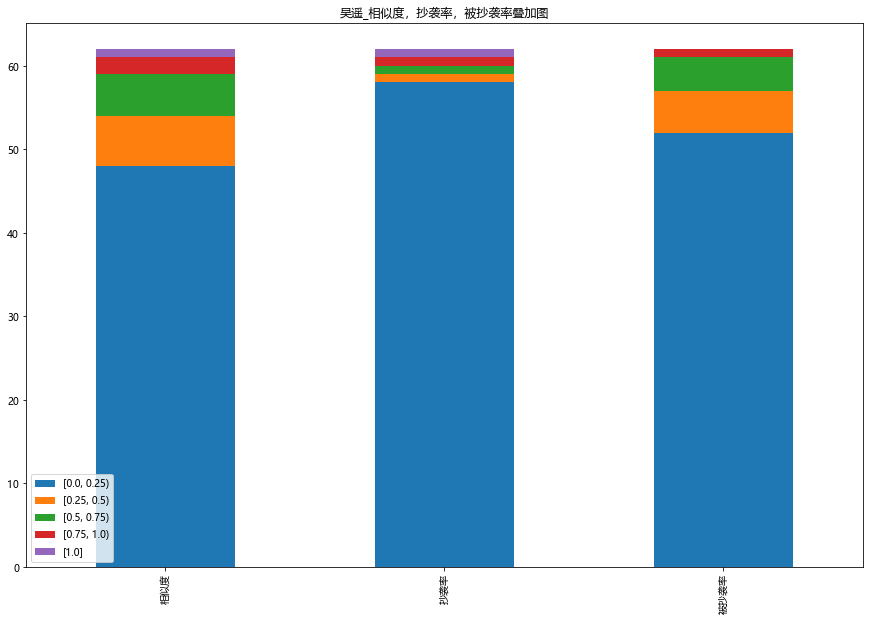

In [9]:
find_name = '吴遥'
info_me = pd.DataFrame(similarity_info)[find_name]
df_me = pd.DataFrame({'姓名':info_me.index, '相似度':info_me.values})
df_me = df_me.sort_values(by='相似度')[::-1]
df_tmp = pd.merge(df_me,df_student_code,on='姓名').iloc[:,[0,1,2,3]]

mask = [1 if i > df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
df_tmp['提交时间是否晚于原作者'] = mask

mask = [1 if i <= df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
df_tmp['提交时间是否早于原作者'] = mask

df_tmp['被抄袭率'] = df_tmp['提交时间是否晚于原作者'] * df_tmp['相似度']
df_tmp['抄袭率'] = df_tmp['提交时间是否早于原作者'] * df_tmp['相似度']

all_info= {}
bins = [0,0.25,0.5,0.75,1.0,1.01]
for key in ['相似度','抄袭率','被抄袭率']:
    # key = '相似度'
    copy_ratio= df_tmp[key]
    segments = pd.cut(copy_ratio,bins,right=False)
    counts=pd.value_counts(segments,sort=False)
    all_info[key] = counts.values
s = pd.DataFrame(all_info)
s.index=counts.index.astype(str)
s = s.T
s = s.rename(columns={"[1.0, 1.01)":"[1.0]"})
s.plot.bar(stacked=True,figsize=(15,10))
plt.title(f"{find_name}_相似度，抄袭率，被抄袭率叠加图")
s.T

# 推广：所有学生的代码检查信息可视化
* 相似度，抄袭率，被抄袭率的叠加图

In [10]:
bins = [0,0.25,0.5,0.75,1.0,1.01]
for find_name in df_tmp['姓名']:

    info_me = pd.DataFrame(similarity_info)[find_name]
    df_me = pd.DataFrame({'姓名':info_me.index, '相似度':info_me.values})
    df_me = df_me.sort_values(by='相似度')[::-1]
    df_tmp = pd.merge(df_me,df_student_code,on='姓名').iloc[:,[0,1,2,3]]

    mask = [1 if i > df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
    df_tmp['提交时间是否晚于原作者'] = mask

    mask = [1 if i <= df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
    df_tmp['提交时间是否早于原作者'] = mask

    df_tmp['被抄袭率'] = df_tmp['提交时间是否晚于原作者'] * df_tmp['相似度']
    df_tmp['抄袭率'] = df_tmp['提交时间是否早于原作者'] * df_tmp['相似度']

    all_info= {}
    for key in ['相似度','抄袭率','被抄袭率']:
        copy_ratio= df_tmp[key]
        segments = pd.cut(copy_ratio,bins,right=False)
        counts=pd.value_counts(segments,sort=False)
        all_info[key] = counts.values
    s = pd.DataFrame(all_info)
    s.index=counts.index.astype(str)
    s = s.T
    s = s.rename(columns={"[1.0, 1.01)":"[1.0]"})
    s.plot.bar(stacked=True,figsize=(15,10))
    plt.title(f"{find_name}_相似度，抄袭率，被抄袭率叠加图")
    plt.savefig(f"可视化图\单个学生相似度，抄袭率，被抄袭率叠加图\{find_name}.svg")
    plt.close("all")

## 判定规则
* 如果提交时间早于原作者，则原作者疑似为抄袭者，原作者抄袭率增加；
* 如果提交时间晚于原作者，则原作者疑似为原创者，原作者被抄袭率增加。

In [11]:
all_copy_info = {}
for name_tmp_2 in df_student_code['姓名']:

    info_me = pd.DataFrame(similarity_info)[name_tmp_2]
    df_me = pd.DataFrame({'姓名':info_me.index, '相似度':info_me.values})
    df_me = df_me.sort_values(by='相似度')[::-1]
    df_tmp = pd.merge(df_me,df_student_code,on='姓名').iloc[:,[0,1,3]]

    mask = [1 if i >= df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
    df_tmp['提交时间是否晚于原作者'] = mask

    mask = [1 if i < df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
    df_tmp['提交时间是否早于原作者'] = mask

    df_tmp['被抄袭率'] = df_tmp['提交时间是否晚于原作者'] * df_tmp['相似度']
    df_tmp['抄袭率'] = df_tmp['提交时间是否早于原作者'] * df_tmp['相似度']

    l1 = df_tmp[df_tmp['抄袭率']!=0]['抄袭率'].astype(float)
    l2 = df_tmp[df_tmp['被抄袭率']!=0]['被抄袭率'].astype(float)

    k1 = np.mean(l1[1:])
    k2 = np.mean(l2[1:])

    copy_ratio_info = {}
    copy_ratio_info['抄袭率'] = k1 
    copy_ratio_info['被抄袭率'] = k2
    copy_ratio_info['平均相似度'] = np.mean(df_tmp['相似度'])
    copy_ratio_info['峰值相似度(前五)'] =  np.mean(df_tmp['相似度'][:5])
    copy_ratio_info['传播广度指数'] =  np.mean(df_tmp['相似度']) **0.5
    copy_ratio_info['传播密度指数'] =  np.mean(df_tmp['相似度'][:5]) **0.5

    copy_ratio_info['时间戳'] = df_tmp[df_tmp['姓名']==name_tmp_2]['时间戳'].values[0]
    all_copy_info[name_tmp_2] = copy_ratio_info

df_copy = pd.DataFrame(all_copy_info).T
df_copy =df_copy.fillna(0.0)
df_copy.to_excel("代码查重结果.xlsx")
df_copy['时间戳'] = df_copy['时间戳'].astype(str)
df_copy.sort_values(by ='抄袭率')[::-1]

,抄袭率,被抄袭率,平均相似度,峰值相似度(前五),传播广度指数,传播密度指数,时间戳
胡佳驹,0.427816,0.359275,0.427383,0.952593,0.653746,0.976009,1652669290.0
张文翠,0.423093,0.420686,0.424826,0.938081,0.651786,0.968546,1652665631.0
周梦林,0.413597,0.473416,0.423776,0.946432,0.650981,0.972847,1652667932.0
乔季赟,0.403948,0.564976,0.424363,0.946432,0.651431,0.972847,1652667621.0
邹玥,0.403735,0.452867,0.416584,0.840774,0.645433,0.916937,1652667008.0
...,...,...,...,...,...,...,...
夏靖杰,0.000000,0.275086,0.279975,0.595645,0.529127,0.771780,1651480173.0
石俊,0.000000,0.328012,0.327219,0.747261,0.572030,0.864443,1651487541.0
吴正彬,0.000000,0.328012,0.327219,0.747261,0.572030,0.864443,1652665745.0
扈书豪,0.000000,0.000000,0.017616,0.218439,0.132726,0.467375,1652668416.0


## 抄袭率，被抄袭率，平均相似度的人数比例分布
* 柱状图
* 分割区间为[0,0.125,0.25,0.375,0.5,1]

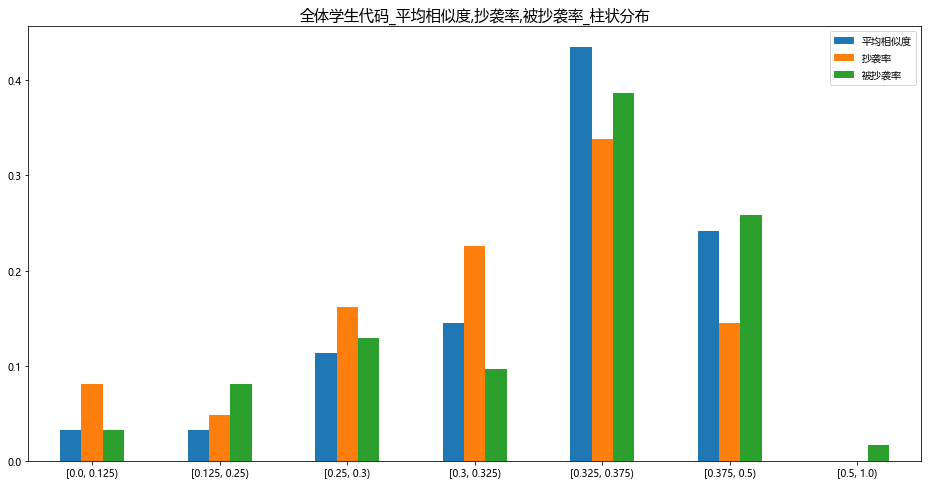

In [12]:
all_info_2 ={}
for key in ['平均相似度','抄袭率','被抄袭率']:
    copy_ratio= df_copy[key]
    bins = [0,0.125,0.25,0.3,0.325,0.375,0.5,1]
    # bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    segments = pd.cut(copy_ratio,bins,right=False)
    counts=pd.value_counts(segments,sort=False)
    all_info_2[key] = counts.values.astype(float)/len(df_copy)
s_2  =pd.DataFrame(all_info_2)
s_2.index = counts.index.astype(str)
s_2.plot.bar(rot=0,figsize = (16,8))
plt.title("全体学生代码_平均相似度,抄袭率,被抄袭率_柱状分布",fontsize=15)
plt.savefig(f"可视化图\\全体学生代码_平均相似度,抄袭率,被抄袭率_柱状分布.svg")

## 全部结果可视化(宏观与微观)
* 相似度
* 抄袭率
* 被抄袭率

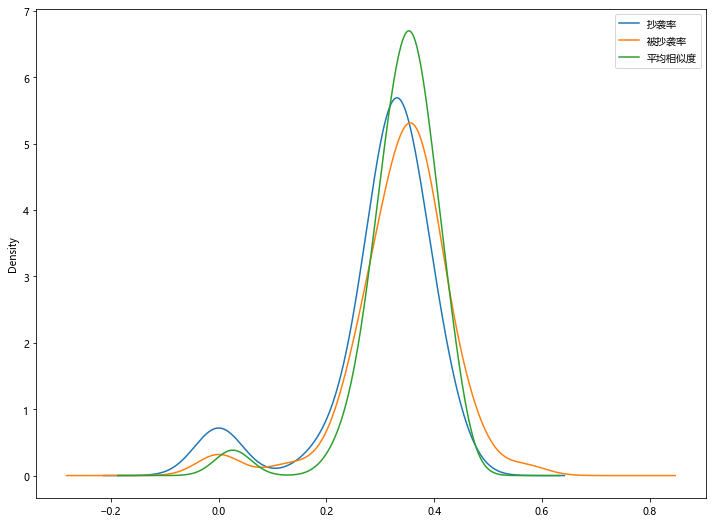

In [13]:
df_copy.iloc[:,:3].plot.kde(figsize= (12,9))
plt.savefig("可视化图\\相似度，抄袭率，被抄袭率的宏观分布.svg")

## 仅展示部分

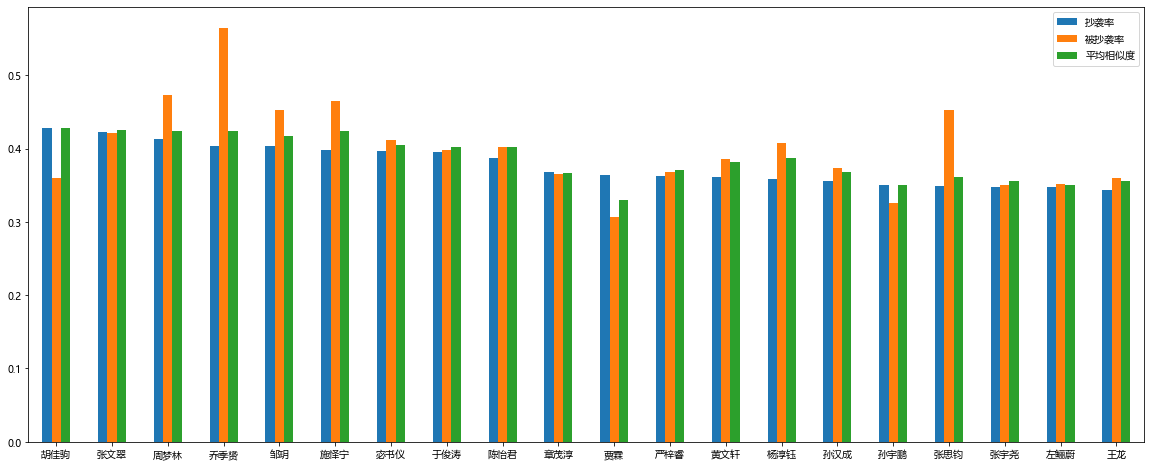

In [14]:
# df_copy.sort_values(by ='抄袭率')[::-1].iloc[15:,:3].plot.bar(rot=0,figsize = (40,8))
df_copy.sort_values(by ='抄袭率')[::-1].iloc[:20,:3].plot.bar(rot=0,figsize = (20,8))
plt.savefig("可视化图\\相似度，抄袭率，被抄袭率的离散分布.svg")

## 生成报告
* 记录所有判定过程
* 包括 
* 姓名	
* 相似度	
* 修改时间	
* 时间戳	
* 提交时间是否晚于原作者	
* 提交时间是否早于原作者	
* 被抄袭率	 
* 抄袭率

In [15]:
for name_tmp in df_student_code['姓名']:
    info_me = pd.DataFrame(similarity_info)[name_tmp]
    df_me = pd.DataFrame({'姓名':info_me.index, '相似度':info_me.values})
    df_me = df_me.sort_values(by='相似度')[::-1]
    df_tmp = pd.merge(df_me,df_student_code,on='姓名').iloc[:,[0,1,2,3]]

    mask = [1 if i > df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
    df_tmp['提交时间是否晚于原作者'] = mask

    mask = [1 if i <= df_tmp['时间戳'][0] else 0 for i in df_tmp['时间戳']]
    df_tmp['提交时间是否早于原作者'] = mask

    df_tmp['被抄袭率'] = df_tmp['提交时间是否晚于原作者'] * df_tmp['相似度']
    df_tmp['抄袭率'] = df_tmp['提交时间是否早于原作者'] * df_tmp['相似度']
    
    df_tmp.to_csv(f"单个学生相似度鉴定报告_CSV/{name_tmp}.csv",index=False)
    df_tmp.to_excel(f"单个学生相似度鉴定报告_EXCEL/{name_tmp}.xlsx",index=False)